In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
raw_data = pd.read_csv('/content/drive/MyDrive/Google Colab Notebooks/Mini Sem 8/dataset/large sample/reliance_2years_60min.csv')

In [5]:
print(raw_data.shape)
raw_data.head()

(3037, 7)


,Unnamed: 0,open,high,low,close,volume,time
0,0,1369.099976,1377.800049,1356.550049,1370.000000,1971498,2020-04-23 03:45:00
1,1,1370.000000,1372.500000,1356.449951,1359.599976,4417574,2020-04-23 04:45:00
2,2,1359.000000,1367.449951,1353.849976,1365.050049,2826126,2020-04-23 05:45:00
3,3,1365.000000,1385.750000,1362.500000,1376.300049,5257084,2020-04-23 06:45:00
4,4,1376.699951,1377.800049,1360.099976,1373.900024,4124412,2020-04-23 07:45:00


In [6]:
open_ds = raw_data.loc[:, ['time', 'open']]
high_ds = raw_data.loc[:, ['time', 'high']]
low_ds = raw_data.loc[:, ['time', 'low']]
close_ds = raw_data.loc[:, ['time', 'close']]
volume_ds = raw_data.loc[:, ['time', 'volume']]

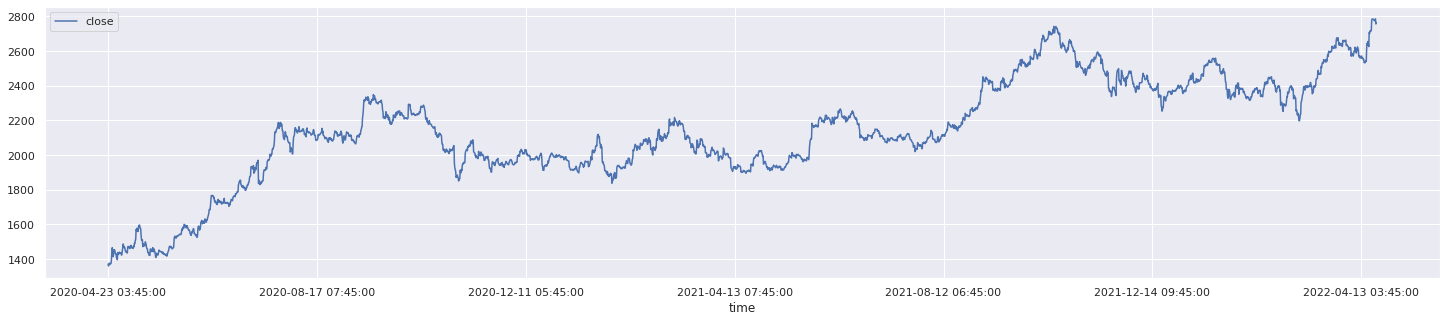

In [7]:
close_ds.plot(x='time', y='close', figsize=(25, 5))

In [8]:
# ema and vwap

from time import time
from datetime import datetime

"""
  Parameters
    d - previous number of data points to use for EMA
    price - stock price list
  Returns
    list of EMA of all points starting from the dth data point
"""
def calculate_ema(d, price) :
  print(f" Days {d} \n Length of prices {len(price)}")
  # formula https://www.investopedia.com/terms/e/ema.asp
  ema = []                                    # stores the ema starting from the dth data point i.e corresponding to price[d]
  ema_yesterday = sum(price[:d])/d            # sma of first d days, this will serve as the EMA of yesterday
  multiplier = 2/(d+1)                        # multiplier 
  for i in range(d,len(price)):
    ema_today = price[i]*multiplier + ema_yesterday*(1-multiplier)  
    ema.append(ema_today)
    ema_yesterday = ema_today
  print(f" Length of EMA list {len(ema)}")
  return ema



"""
  Parameters
    df - original dataframe
  Returns
    list of vwap
"""

def calculate_vwap(df):
  
  time_format = "%Y-%m-%d %H:%M:%S"
  
  sum_pv = 0
  sum_volume = 0
  
  vwap = []
  
  previous_day = datetime.strptime(df["time"][0], time_format).day

  for i in range(len(df)):
    
    current_day = datetime.strptime(df["time"][i], time_format).day

    if(current_day!=previous_day):
      sum_pv = 0
      sum_volume = 0

    previous_day = current_day

    sum_pv += ((df["high"][i] + df["low"][i] + df["close"][i])/3) * df["volume"][i]
    sum_volume += df["volume"][i]
    vwap.append(sum_pv/sum_volume)
  return vwap

In [9]:
# price list
price = list(close_ds.drop('time', axis=1).values)
print(f"len prices = {len(price)}")

# ema taking 10 previous points for calculation
ema = calculate_ema(10,price)
print(f"len ema = {len(ema)}")

vwap = calculate_vwap(raw_data)
print(f"len vwap = {len(vwap)}")

len prices = 3037
 Days 10 
 Length of prices 3037
 Length of EMA list 3027
len ema = 3027
len vwap = 3037


In [10]:
# make all ema, vwap, prices lists of equal length 
price = price[-len(ema):]
vwap = vwap[-len(ema):]

No handles with labels found to put in legend.


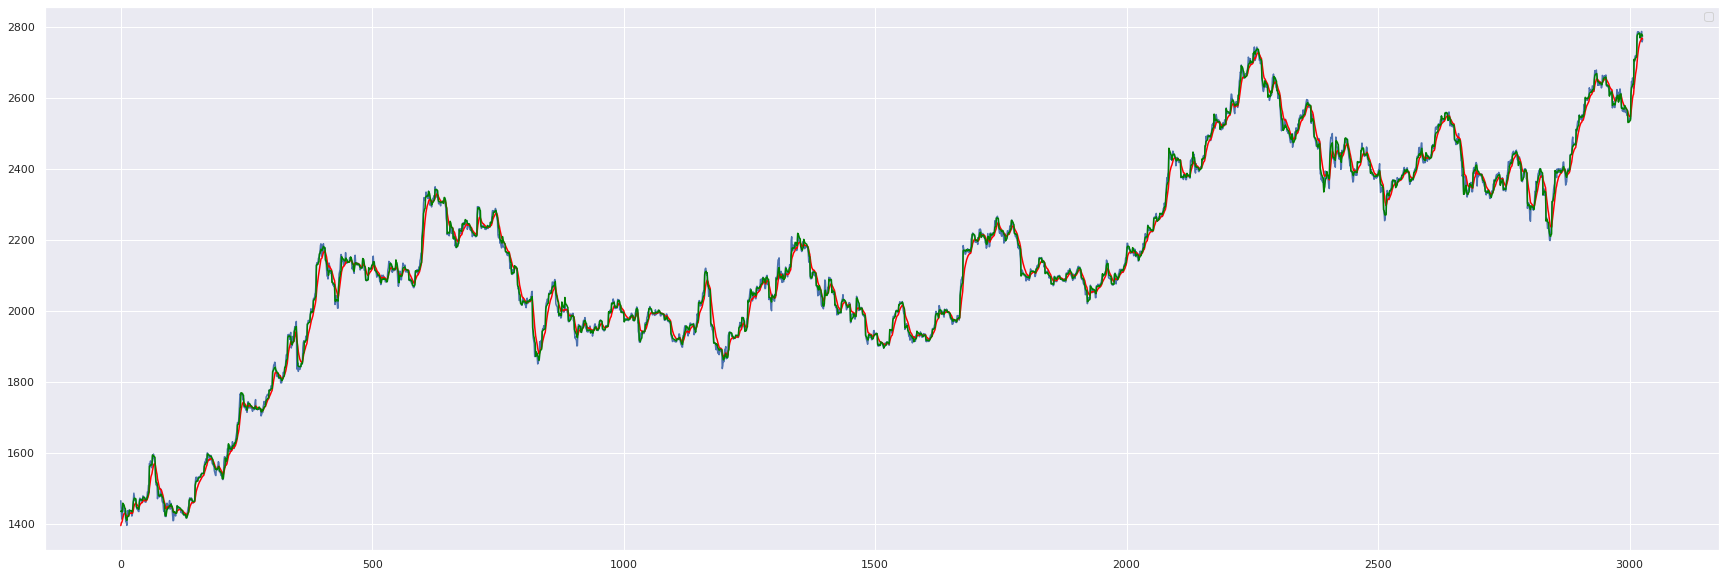

In [11]:
plt.figure(figsize=(30,10))

plt.plot(price)
plt.plot(ema, color='red')
plt.plot(vwap,color='green')
plt.legend()
plt.show()

In [12]:

# split a multivariate sequence into samples
# n_steps ---> number of lag observations

def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [13]:

ema = np.array(ema).reshape(len(ema), 1)
vwap = np.array(vwap).reshape(len(vwap), 1)
price = np.array(price).reshape(len(price), 1)
dataset = np.hstack((ema, vwap, price))
print(dataset)

[[1395.07410889 1435.15729957 1465.        ]
 [1402.47882524 1436.79016276 1435.80004883]
 [1404.46449782 1434.26341944 1413.40002441]
 ...
 [2767.89703307 2779.27396716 2786.39990234]
 [2765.88849936 2775.20206099 2756.85009766]
 [2765.36331766 2773.29525357 2763.        ]]


In [14]:
n_steps = 3 
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)
print(X[0], y[0])

(3025, 3, 3) (3025,)
[[1395.07410889 1435.15729957 1465.        ]
 [1402.47882524 1436.79016276 1435.80004883]
 [1404.46449782 1434.26341944 1413.40002441]] 1413.4000244140625


In [22]:
# train_test_split 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# type(X_train.values)

(2117, 3, 3)
(2117,)
(908, 3, 3)
(908,)


In [23]:
# flattening input for model feeding 

n_input = X_train.shape[1] * X_train.shape[2]
X_train_flattened = X_train.reshape((X_train.shape[0], n_input))
X_test_flattened = X_test.reshape((X_test.shape[0], n_input))
print(X_train_flattened.shape)
print(X_test_flattened.shape)

(2117, 9)
(908, 9)


In [24]:
# Model training

from tensorflow import keras 
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten

# Multilayer perceptron 

model_mlp = Sequential()
model_mlp.add(Dense(100, activation='relu', input_dim=n_input))
model_mlp.add(Dense(1))
model_mlp.compile(loss='mse', optimizer=keras.optimizers.Adam(lr=0.0003))
model_mlp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               1000      
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,101
Trainable params: 1,101
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [25]:
mlp_history = model_mlp.fit(X_train_flattened, y_train, validation_data=(X_test_flattened, y_test), epochs=60, verbose=2)

Epoch 1/60
67/67 - 24s - loss: 1247239.7500 - val_loss: 95019.7188 - 24s/epoch - 356ms/step
Epoch 2/60
67/67 - 0s - loss: 8754.8271 - val_loss: 345.6888 - 198ms/epoch - 3ms/step
Epoch 3/60
67/67 - 0s - loss: 245.7097 - val_loss: 294.8337 - 175ms/epoch - 3ms/step
Epoch 4/60
67/67 - 0s - loss: 238.0885 - val_loss: 294.7543 - 196ms/epoch - 3ms/step
Epoch 5/60
67/67 - 0s - loss: 237.6590 - val_loss: 295.2775 - 162ms/epoch - 2ms/step
Epoch 6/60
67/67 - 0s - loss: 237.5336 - val_loss: 294.6330 - 166ms/epoch - 2ms/step
Epoch 7/60
67/67 - 0s - loss: 237.4071 - val_loss: 294.5625 - 199ms/epoch - 3ms/step
Epoch 8/60
67/67 - 0s - loss: 237.6348 - val_loss: 294.5925 - 171ms/epoch - 3ms/step
Epoch 9/60
67/67 - 0s - loss: 237.3635 - val_loss: 295.1818 - 163ms/epoch - 2ms/step
Epoch 10/60
67/67 - 0s - loss: 237.6782 - val_loss: 295.3120 - 167ms/epoch - 2ms/step
Epoch 11/60
67/67 - 0s - loss: 238.1362 - val_loss: 294.3994 - 169ms/epoch - 3ms/step
Epoch 12/60
67/67 - 0s - loss: 237.1686 - val_loss: 294

Text(0, 0.5, 'MSE')

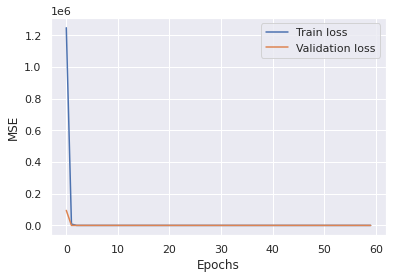

In [26]:
# plots 
fig = plt.figure()
plt.plot(mlp_history.history['loss'], label='Train loss')
plt.plot(mlp_history.history['val_loss'], label='Validation loss')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MSE')

In [29]:
# RMSE calculation
from sklearn.metrics import mean_squared_error
mlp_train_pred = model_mlp.predict(X_train_flattened)
mlp_test_pred = model_mlp.predict(X_test_flattened)
print('Train rmse:', np.sqrt(mean_squared_error(y_train, mlp_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(y_test, mlp_test_pred)))

Train rmse: 15.236373154813851
Validation rmse: 16.962578443946978


In [33]:
print(y_test[0:10])
print(mlp_test_pred[0:10])

[2369.60009766 2386.5        2380.         2378.5        2380.69995117
 2376.30004883 2382.         2373.30004883 2422.19995117 2424.94995117]
[[2379.6572]
 [2382.515 ]
 [2385.3867]
 [2385.7776]
 [2384.725 ]
 [2384.2556]
 [2383.5254]
 [2382.878 ]
 [2388.7034]
 [2403.2368]]


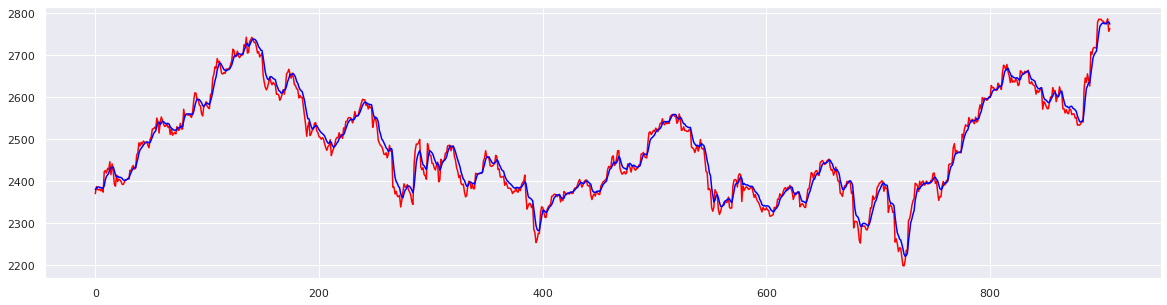

In [31]:
# pd.Series(y_test[:100]).plot(figsize=(30, 10))
# pd.Series(cnn_test_pred.flatten()[:100]).plot(figure=(30, 10))
plt.figure(figsize=(20, 5))
plt.plot(pd.Series(y_test), color='red')
plt.plot(pd.Series(mlp_test_pred.flatten()), color='blue')

In [34]:
# MAPE calculation
from sklearn.metrics import mean_absolute_percentage_error
print('Train MAPE:', mean_absolute_percentage_error(y_train, mlp_train_pred))
print('Validation MAPE:', mean_absolute_percentage_error(y_test, mlp_test_pred))

Train MAPE: 0.0056489098715619785
Validation MAPE: 0.005197979052305502


In [ ]:
# classification accuracy 

# # y_test_flattened = y_test.values.flatten()
# cnn_test_pred_flattened = cnn_test_pred.flatten()
# total_number_of_samples = len(y_test)
# no_of_features = X_test.shape[2]
# no_of_correct_predictions = 0
# for i in range(0, total_number_of_samples):
#     prev_value = X_test[i][n_steps-1][no_of_features-1]
#     actual_value = y_test[i]
#     predicted_value = cnn_test_pred_flattened[i]
#     print(f'i = {i}, prev_val = {prev_value}, actual = {actual_value}, pred = {predicted_value}')
#     if ((prev_value > actual_value and prev_value > predicted_value) or (prev_value < actual_value and prev_value < predicted_value)):
#         no_of_correct_predictions += 1

# print(f'Accuracy of correct trend prediction = {no_of_correct_predictions / total_number_of_samples}');
